# Lending Club Case Study

**Problem Statement**

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
1.  `If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company`
2. `If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company`

 
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


When a person applies for a loan, there are two types of decisions that could be taken by the company:
1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
    - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
    - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

#### Objective:

The company wants to identify the driving factors which influences the loan applicants defaulting the loan so that the company can utilize this information for risk assement and cutting down the credit loss using EDA

In [1]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file into a dataframe and printing top 5 rows
loan_df = pd.read_csv('loan.csv', low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
loan_df.shape

(39717, 111)

#### No. of rows = 39717
#### No. of columns = 111

In [4]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


## Data Cleansing

### Removing all the variables which are related to customer behaviour as these were not available at the time of loan application approval process.

In [5]:
loan_df_cleansed = loan_df.copy(deep=True)

In [6]:
customer_behaviour_variables = [ 'application_type', 'collection_recovery_fee', 'delinq_2yrs', 'earliest_cr_line', 
                                'inq_last_6mths', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',                                
                                'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 
                                'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 
                                'total_rec_prncp']


loan_df_cleansed.drop(customer_behaviour_variables, axis=1, inplace=True)

In [7]:
# Dropping other redundant columns like member_id, emp_title, url, desc, title
# we already have id columns. So, ignoring member_id.

loan_df_cleansed.drop(['member_id', 'emp_title', 'url', 'desc', 'title'], axis=1, inplace=True)

In [8]:
loan_df_cleansed.shape

(39717, 85)

In [9]:
# Check for null values in columns
loan_df_cleansed.isnull().sum()

id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 85, dtype: int64

#### We could notice that some of the columns only have NA for all the rows. For example, 'tot_hi_cred_lim', 'total_bc_limit'.So, we can drop all such columns

In [10]:
# Dropping all the columns which have only NA values in all rows

max_nulls_or_nas = 39717

loan_df_cleansed = loan_df_cleansed.loc[:, (loan_df_cleansed.isnull().sum() < max_nulls_or_nas)]

In [11]:
loan_df_cleansed.shape

(39717, 31)

In [12]:
loan_df_cleansed.isnull().sum()

id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
mths_since_last_delinq        25682
mths_since_last_record        36931
initial_list_status               0
next_pymnt_d                  38577
collections_12_mths_ex_med       56
policy_code                       0
acc_now_delinq                    0
chargeoff_within_12_mths    

In [13]:
# Dropping columns which have a lot of missing values
# mths_since_last_delinq has around 65% missing values, mths_since_last_record - around 93% and next_pymnt_d - around 97%           

loan_df_cleansed.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1, inplace=True)

In [14]:
# Checking for unique values in each column

loan_df_cleansed.nunique(axis=0)

id                            39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
zip_code                        823
addr_state                       50
dti                            2868
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
pub_rec_bankruptcies              3
tax_liens                   

In [15]:
# Dropping all columns which have only 1 unique value across all rows in the dataset

loan_df_cleansed = loan_df_cleansed.loc[:, (loan_df_cleansed.nunique(axis=0) > 1)]

In [16]:
loan_df_cleansed.shape

(39717, 20)

In [17]:
# The applicants with loan_status = current indicate already approved applications. So, can be ignored for the current analysis
# Drop all the records with loan_status = current
loan_df_cleansed = loan_df_cleansed[loan_df_cleansed['loan_status'] != 'Current']

In [18]:
loan_df_cleansed.shape

(38577, 20)

### After cleaning all data, the dataset now has 38577 rows and 20 columns


In [19]:
#Check the datatypes of all the columns of the dataframe
loan_df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

In [20]:
# Removing the % in Interest rate and fixing the datatype.

loan_df_cleansed['int_rate'] = loan_df_cleansed['int_rate'].apply(lambda x: x.replace('%', ''))
loan_df_cleansed.int_rate = loan_df_cleansed.int_rate.astype('float64')

In [21]:
loan_df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  float64
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

In [22]:
# Checking different values for pub_rec_bankruptcies
loan_df_cleansed.pub_rec_bankruptcies.value_counts()   

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
# Checking different values for emp_length
loan_df_cleansed.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [24]:
# Checking different values for term
loan_df_cleansed.term.value_counts() 

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [25]:
loan_df_cleansed.describe().apply(lambda s:s.apply(lambda x: format(x, 'f')))

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000
mean,676378.706561,11047.025430,10784.058506,10222.481123,11.932219,322.466318,68777.973681,13.272727,0.043479
std,209263.898488,7348.441646,7090.306027,7022.720644,3.691327,208.639215,64218.681802,6.673044,0.204583
min,54734.000000,500.000000,500.000000,0.000000,5.420000,15.690000,4000.000000,0.000000,0.000000
25%,512033.000000,5300.000000,5200.000000,5000.000000,8.940000,165.740000,40000.000000,8.130000,0.000000
50%,656423.000000,9600.000000,9550.000000,8733.440000,11.710000,277.860000,58868.000000,13.370000,0.000000
75%,829146.000000,15000.000000,15000.000000,14000.000000,14.380000,425.550000,82000.000000,18.560000,0.000000
max,1077501.000000,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6000000.000000,29.990000,2.000000


### Univariate analysis

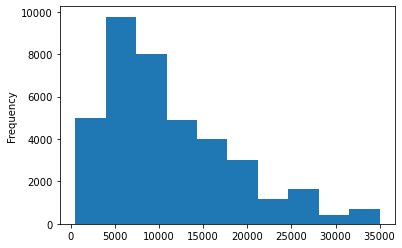

In [26]:
#Point1: Univariate analysis of Loan Amount data
loan_df_cleansed.loan_amnt.plot.hist()
plt.show()

#### This indicates that the loan amount for most applications is between 5k to 10K

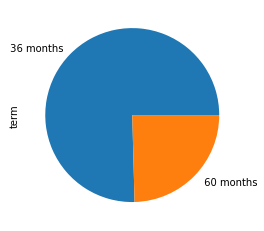

In [27]:
# Point 2: Univariate analysis of Loan Term
loan_df_cleansed.term.value_counts().plot.pie() 
plt.show()

#### More loan applicants tend to go for 36 months term compared to 60 months

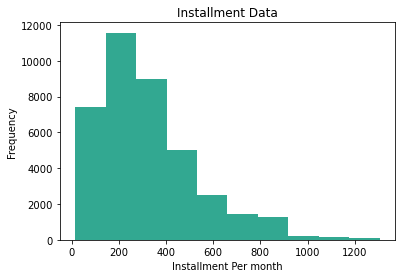

In [28]:
# Point 3: Univariate analysis of  Monthly Installments
plt.title('Installment Data')
plt.xlabel("Installment Per month")
loan_df_cleansed.installment.plot.hist(color ="#32a891")
plt.show()

#### Most of the appliations have around 200 to 400 as the monthly installment

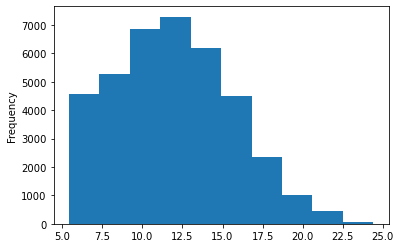

In [29]:
# Point 4: Univariate analysis of  Interest rate
loan_df_cleansed.int_rate.plot.hist()
plt.show()

#### For most applications the interest rate is around 10% to 14%

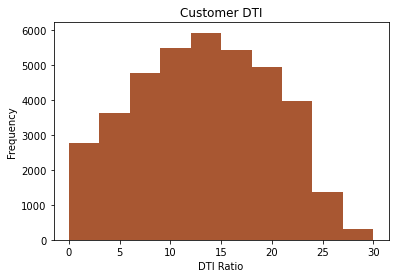

In [30]:
# Point 5: Univariate analysis of DTI
plt.title('Customer DTI')
plt.xlabel("DTI Ratio")
loan_df_cleansed.dti.plot.hist(color ="#a85732")
plt.show()

#### For majority of the applications the DTI is around 10 to 18

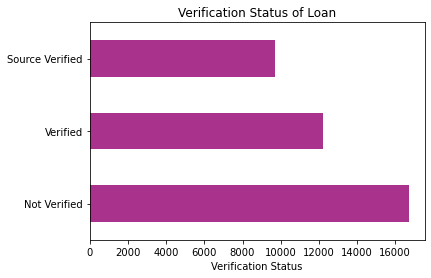

In [31]:
# Point 6: Univariate analysis of  Verification Status of Loan
plt.title('Verification Status of Loan')
plt.xlabel("Verification Status")
loan_df_cleansed.verification_status.value_counts().plot.barh(color="#a8328c")
plt.show()

#### We observe that more number of cutomer loan application have status as "Not Verified"

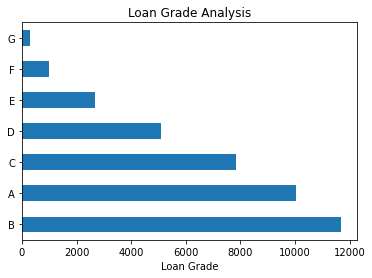

In [32]:
# Point 7: Univariate analysis of Loan Grade
plt.title('Loan Grade Analysis')
plt.xlabel("Loan Grade")
loan_df_cleansed.grade.value_counts().plot.barh()
plt.show()

#### More number of loan applications belong to "B" Grade

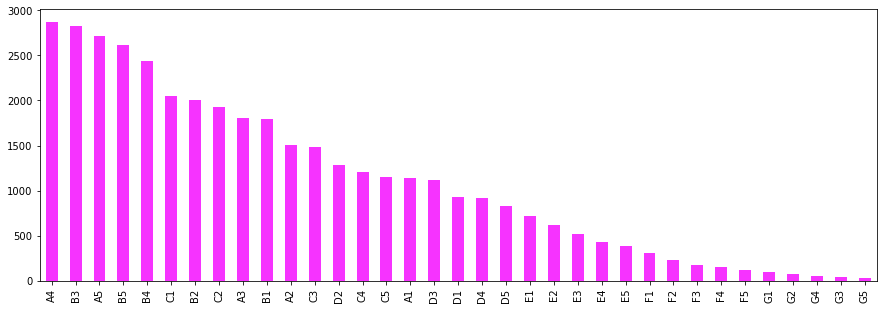

In [33]:
# Point 8: Univariate analysis of  Loan Sub-Grade by LC

plt.figure(figsize=[15,5])
loan_df_cleansed.sub_grade.value_counts().plot.bar(color="#F633FF")
plt.show()

####  More number of loan applications belong to "A4" Sub-Grade

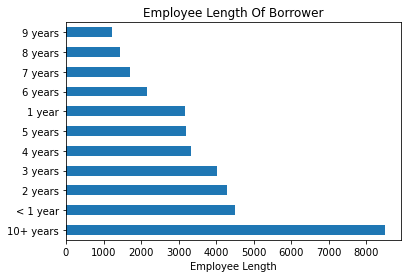

In [34]:
# Point 9: Univariate analysis Employee Lenght of Borrower
plt.title('Employee Length Of Borrower')
plt.xlabel("Employee Length")
loan_df_cleansed.emp_length.value_counts().plot.barh()
plt.show()

#### More applications belong to applicants with 10+ years of employement

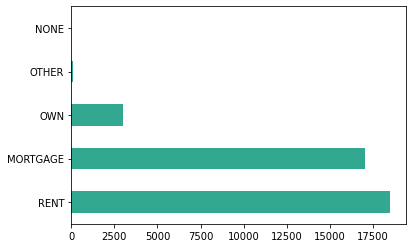

In [35]:
# Point 10: Univariate analysis "Home Ownership" of borrower
loan_df_cleansed.home_ownership.value_counts().plot.barh(color="#32a891")
plt.show()

#### Most loan applicants stay in rented properties followed by applicants who pay mortgage.

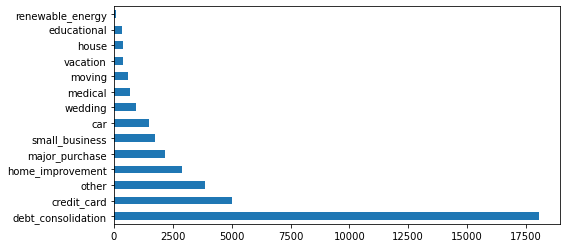

In [36]:
# Point 11: Univariate analysis purpose of Loan seeking
plt.figure(figsize=[8,4])
loan_df_cleansed.purpose.value_counts().plot.barh()
plt.show()

#### Debt consolidation and credit card card repayment is major purpose of Loan

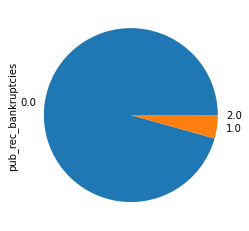

In [37]:
# Point 12: Univariate analysis of public record of bankruptcies

loan_df_cleansed.pub_rec_bankruptcies.value_counts().plot.pie()
plt.show()  

#### Maximum customers do not have any bankruptcies filed

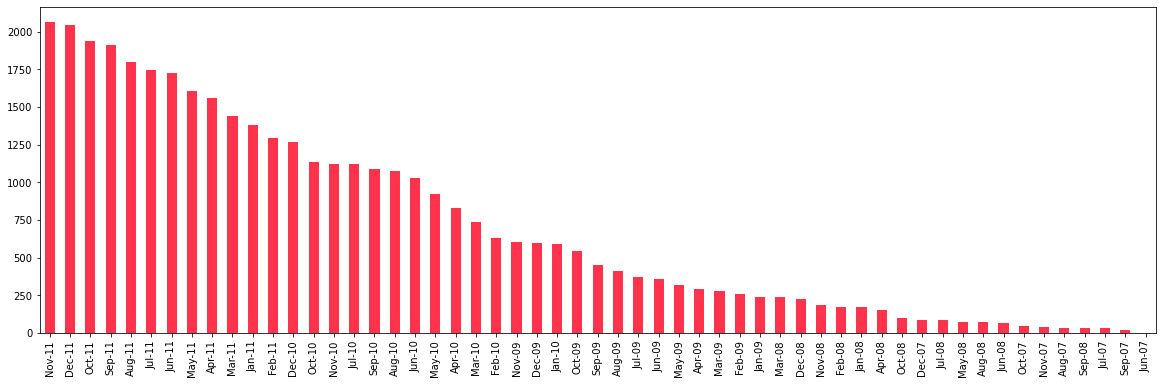

In [38]:
# Point 13: Univariate analysis of Loan Issue Date
plt.figure(figsize=[20,6])
loan_df_cleansed.issue_d.value_counts().plot.bar(color="#FF334B")
plt.show()

#### Maximum Loans are issued in the month of December 2011

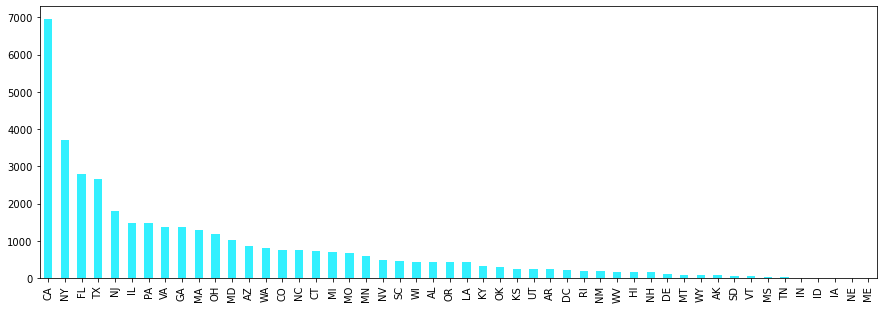

In [39]:
# Point 14: Univariate analysis Borrower State
plt.figure(figsize=[15,5])
loan_df_cleansed.addr_state.value_counts().plot.bar(color="#33F0FF")
plt.show()

#### Maximum loan applications are from CA state

# Segmented Univariate Analysis

In [40]:
## Deriving a new column with segments for the int_rate column using pd.qcut

loan_df_cleansed['int_rate_segments'] = pd.qcut(x=loan_df_cleansed.int_rate, q=[0, 0.33, 0.66, 1], labels=["Low", "Medium", "High"])

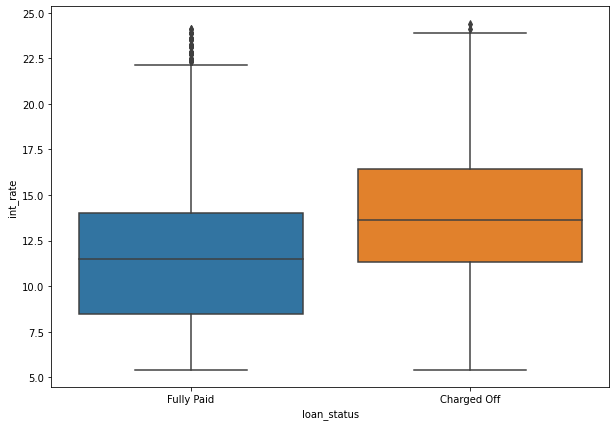

In [41]:
plt.figure(figsize=[10,7])
sns.boxplot(data=loan_df_cleansed, y="int_rate" , x="loan_status")
plt.show()

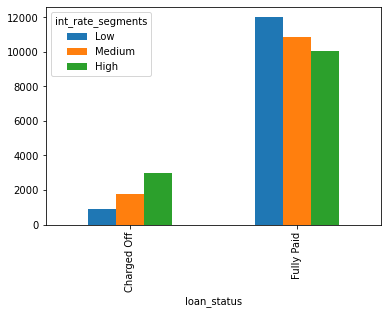

In [42]:
loan_df_cleansed.groupby('loan_status')['int_rate_segments'].value_counts().unstack().plot(kind='bar')
plt.show()

#### People tend to default the loans whenever the interest rate is higher comparing the above plots

In [43]:
# We can see outliers from the plot. So, removing all the data points greater than 22.

loan_df_cleansed = loan_df_cleansed[loan_df_cleansed['int_rate'] < 22]

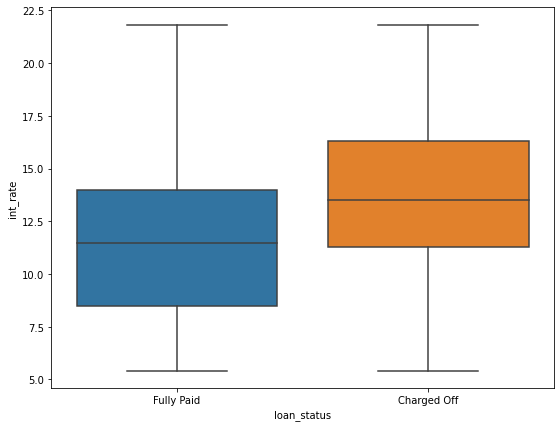

In [44]:
# plotting the graph again after removing the outliers

plt.figure(figsize=[9,7])
sns.boxplot(data=loan_df_cleansed, x="loan_status", y="int_rate")
plt.show()

In [45]:
## Deriving a new column "annual_inc_segments" for the annual_inc column using pd.qcut

loan_df_cleansed['annual_inc_segments'] = pd.qcut(x=loan_df_cleansed.annual_inc, q=[0, 0.33, 0.66, 1], labels=["Low Income", "Medium Income", "High Income"])

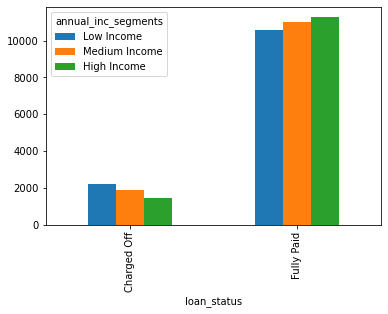

In [46]:
loan_df_cleansed.groupby('loan_status')['annual_inc_segments'].value_counts().unstack().plot(kind='bar')
plt.show()

#### Looking at the above graph, we can say that people with lower incomes tend to default the loans and higher income customer generally pay off the loans.

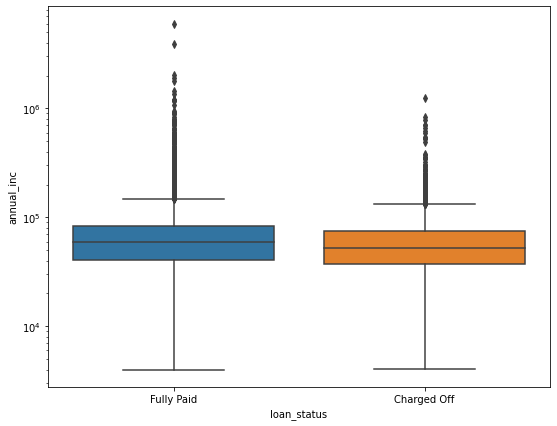

In [47]:
# Plotting the graph between Loan_Status and Annual Income

plt.figure(figsize=[9,7])
sns.boxplot(data=loan_df_cleansed, x="loan_status", y="annual_inc")
plt.yscale("log")
plt.show()

In [48]:
# Removing all the datapoints where annual_inc > 10**5

loan_df_cleansed = loan_df_cleansed[loan_df_cleansed['annual_inc'] < 100000]

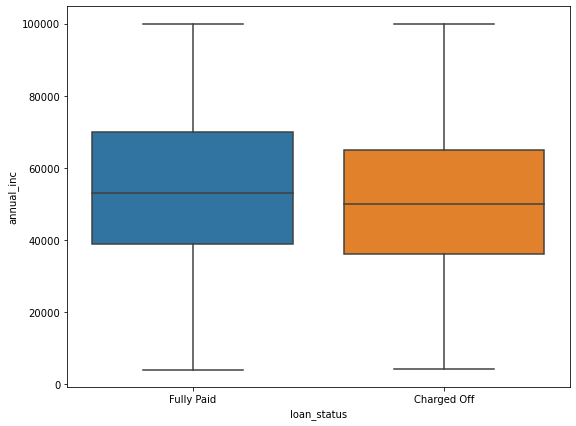

In [49]:
# Plotting again after removing the outliers

plt.figure(figsize=[9,7])
sns.boxplot(data=loan_df_cleansed, x="loan_status", y="annual_inc")
plt.show()

#### Higher income applicants tend to fully pay off the loans

<Figure size 2160x1440 with 0 Axes>

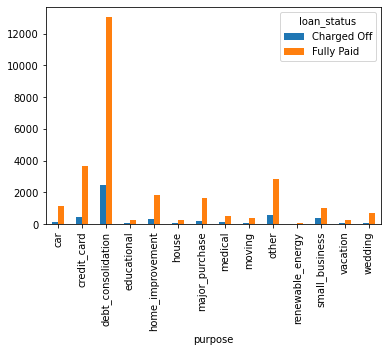

In [50]:
# Plotting the graph between Loan_Status and Purpose of the loan

plt.figure(figsize=(30,20))
loan_df_cleansed.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

#### People tend to payoff loans whenever the purpose of the loan is "debt consolidation" followed by "credit_card" payments.

<Figure size 2160x1440 with 0 Axes>

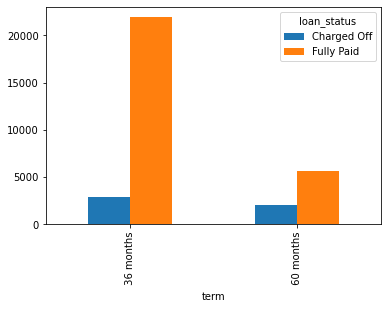

In [51]:
# Plotting the graph between Loan_Status and term of the loan

plt.figure(figsize=(30,20))
loan_df_cleansed.groupby('term')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

#### Loan applications are more for 36 months compared to 60 months. 36 months loans are more likely to get paid off compared to the  60 month loans.

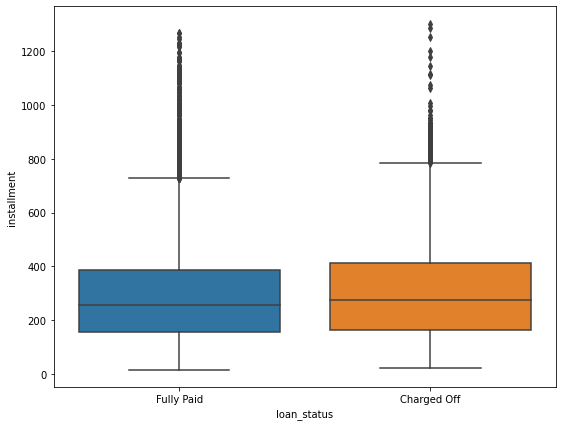

In [52]:
# Plotting the graph between Loan_Status and Monthly Installments

plt.figure(figsize=[9,7])
sns.boxplot(data=loan_df_cleansed, x="loan_status", y="installment")
plt.show()

#### Loan applications with higher installements tend to default compared to the lower installments.Also, indicates that there could be some outliers in installment column

<Figure size 2160x1440 with 0 Axes>

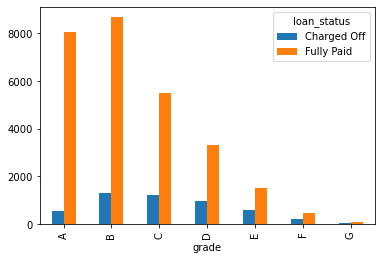

In [53]:
# Plotting the graph between Loan_Status and Grade

plt.figure(figsize=(30,20))
loan_df_cleansed.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

#### Loan applications with Grade "B" seems to default more compared to other grades.

<Figure size 2160x1440 with 0 Axes>

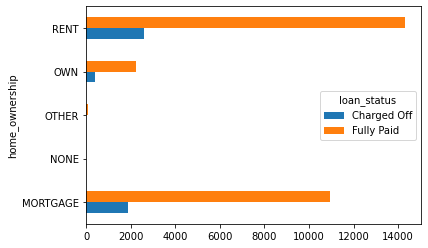

In [54]:
# Plotting the graph between Loan_Status and Home Ownership of the borrower

plt.figure(figsize=(30,20))
loan_df_cleansed.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='barh')
plt.show()

#### Loan applicants with rented properties seems to default loans compared to other home ownership categories

<Figure size 2160x1440 with 0 Axes>

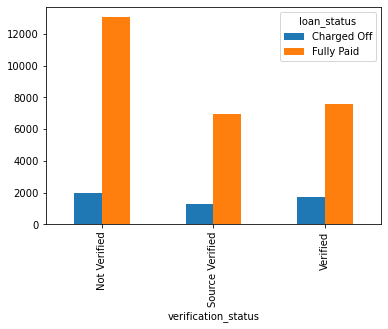

In [55]:
# Plotting the graph between Loan_Status and Verification Status

plt.figure(figsize=(30,20))
loan_df_cleansed.groupby('verification_status')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

#### Loan applicants who default the loan, the verification status is "Not Verified". May be the applications are not verified thoroughly.

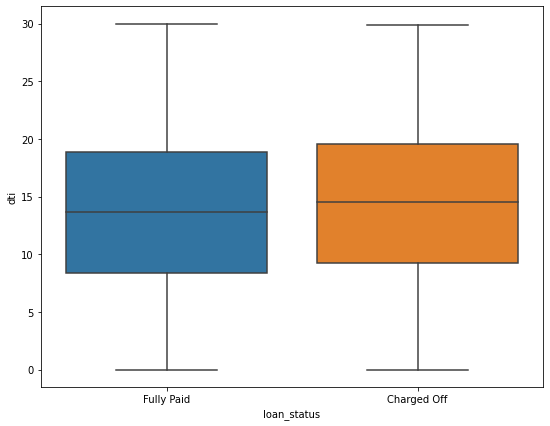

In [56]:
# Plotting the graph between Loan_Status and DTI

plt.figure(figsize=[9,7])
sns.boxplot(data=loan_df_cleansed, x="loan_status", y="dti")
plt.show()

#### Loan applicants who default seem to have a slighly higher DTI compared to the fully paid applicants.

<Figure size 2160x1440 with 0 Axes>

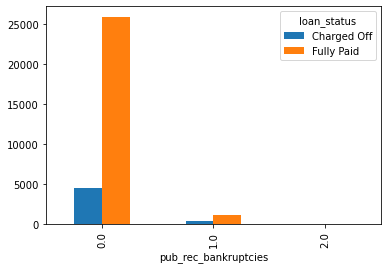

In [57]:
# Plotting the graph between Loan_Status and pub_rec_bankruptcies

plt.figure(figsize=(30,20))
loan_df_cleansed.groupby('pub_rec_bankruptcies')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

#### Loan applicants who default seem to have no record of bankruptcy

# Bivariate Analysis

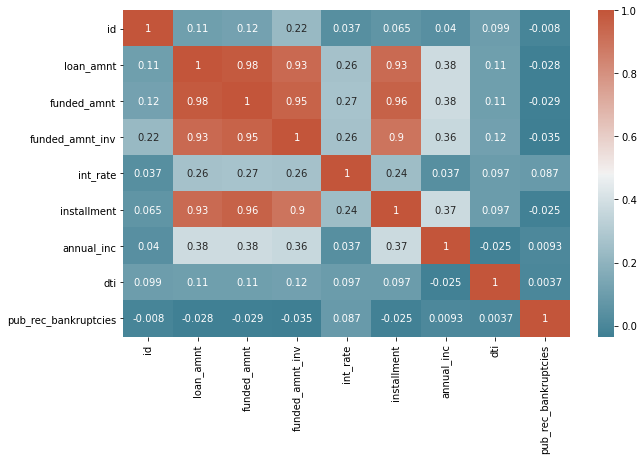

In [58]:
# Using the correlation matrix and plotting the heatmap to understand the correction between continuos variables

corr = loan_df_cleansed.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
            cmap=sns.diverging_palette(220,20, as_cmap=True))
plt.show()

#### HeatMap shows that following observations.
loan_amnt, funded_amnt, funded_amnt_inv seems to have high positive correlation (0.98, 0.93, 0.95) indicating that when one variable value increases then the other variables values also increase.

loan_amount and int_rate also seems to have high positive correlation of 0.93

loan_amount and installment also seems to have high positive correlation of 0.93

loan_amount seems to have slightly positive correlation with int_rate, annual_inc, dti

installment and int_rate also seems to have positive correlation of 0.24

installment and annual_inc seems to have positive correlation of 0.37

annual_inc to dti seems to have slightly negative correlation

annual_inc seems to have slightly positive correlation with loan_amnt, int_rate, installment

Public bankruptcies record and loan amount is Negatively Correlated

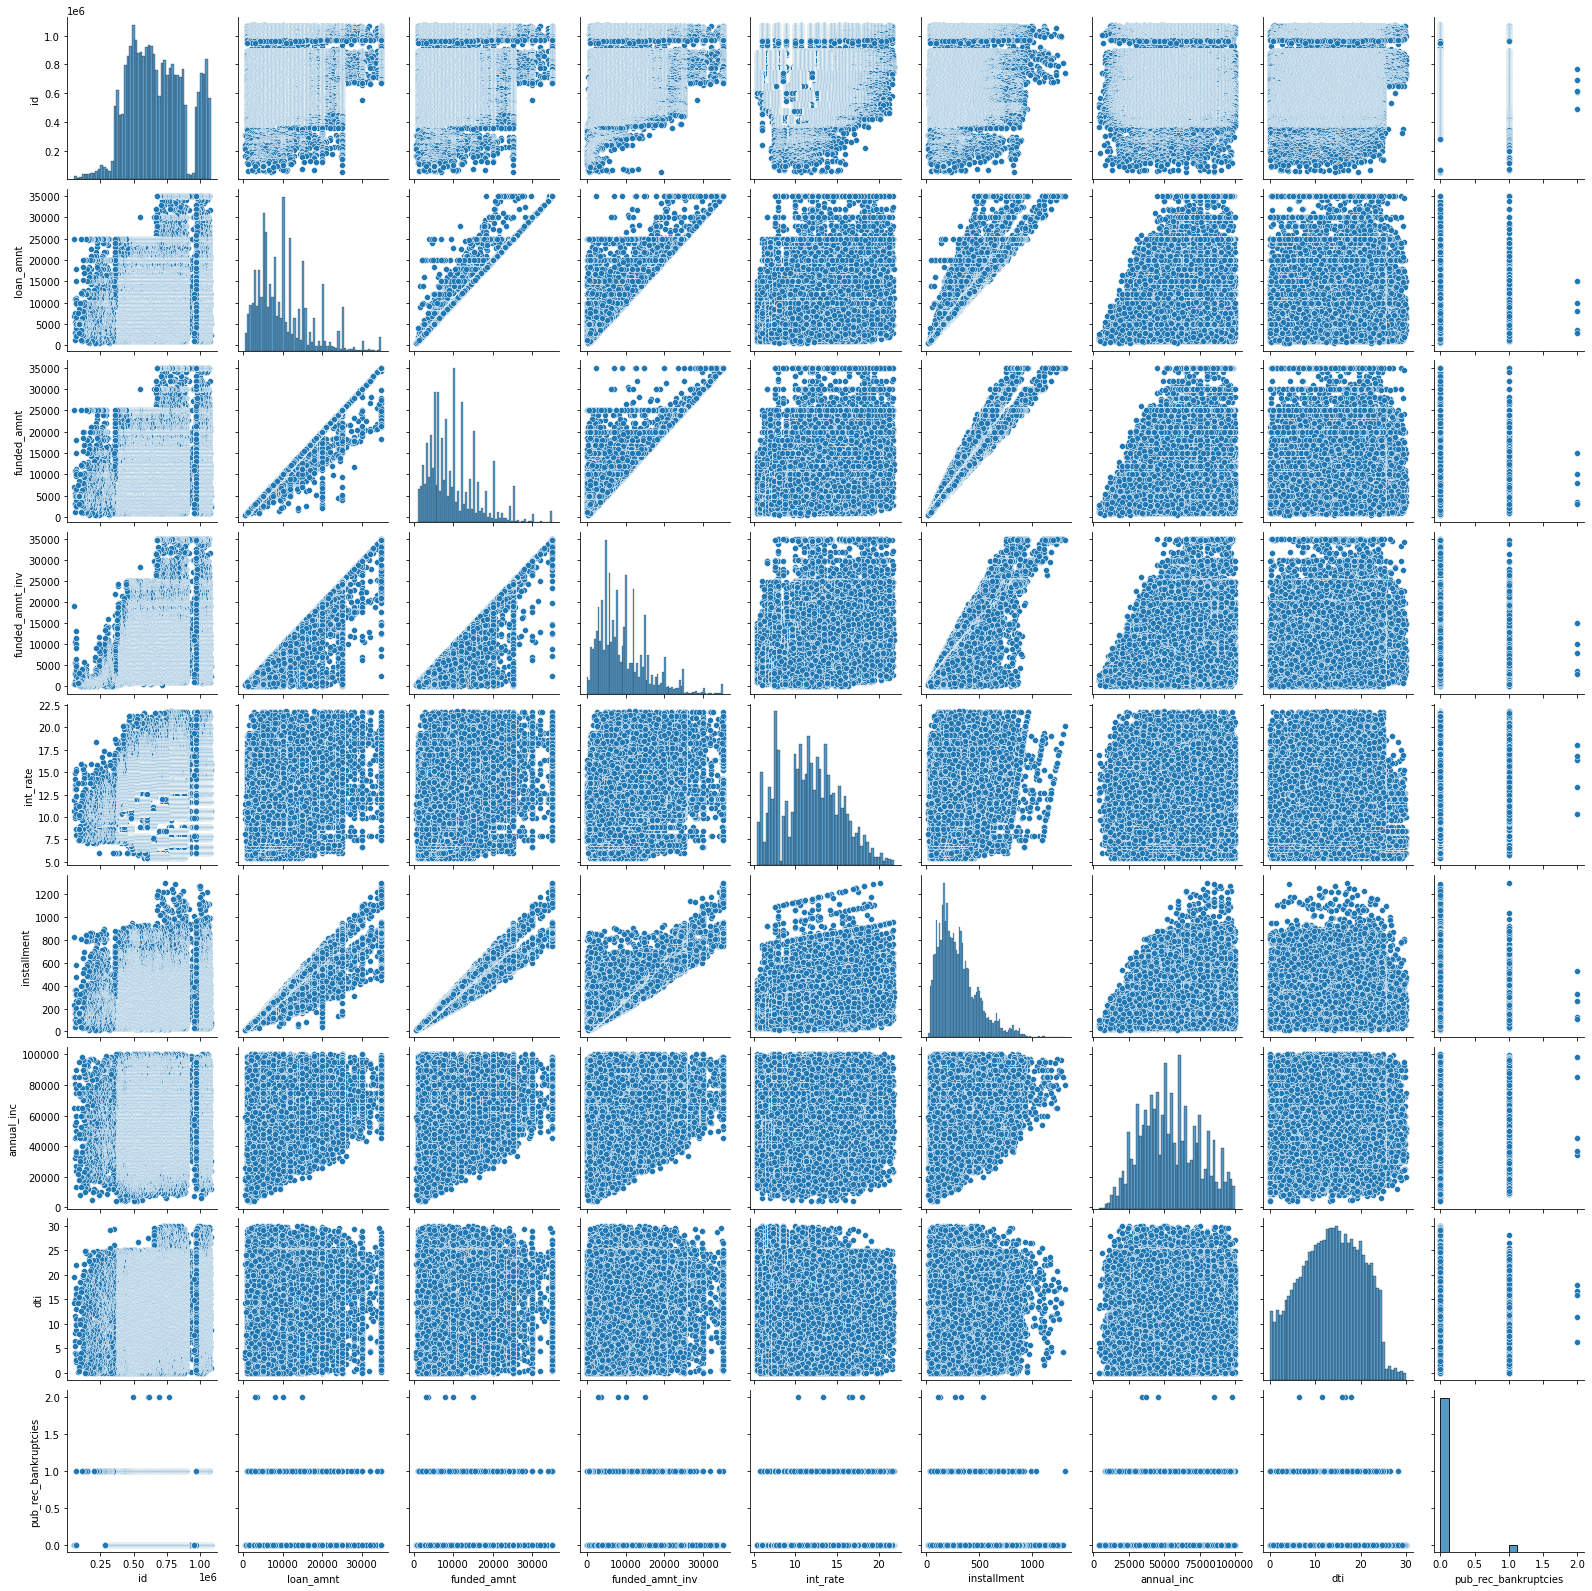

In [59]:
# Plotting a pairplot 
sns.pairplot(loan_df_cleansed)

#### Following conclusion can be drawn from above chart
- Loan_amount,funded amount and installment is having linear relationship in positive direction
- Annual income and installment is having linear relationship in positive direction

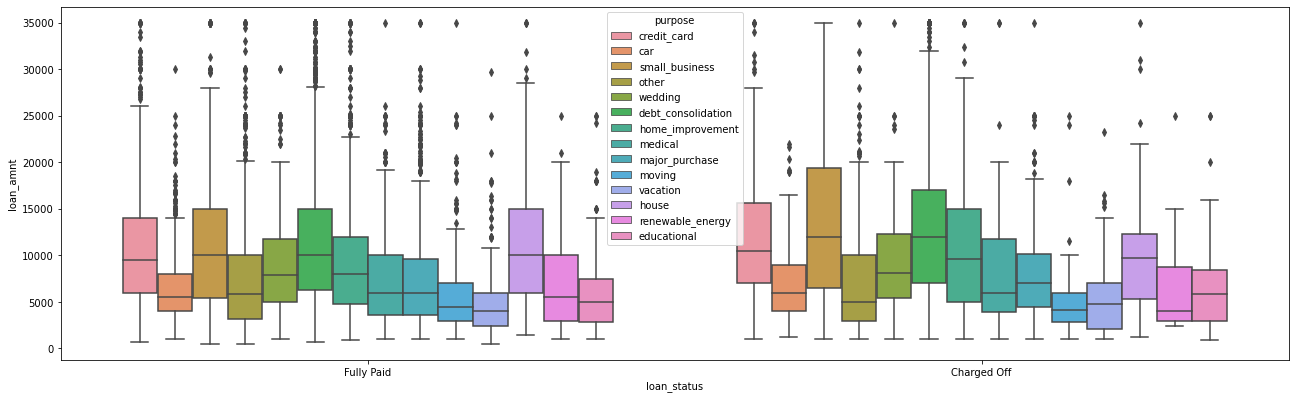

In [67]:
# Plotting the graph between Loan_Status and Loan_amount along with Purpose

plt.figure(figsize=[22,6.5])
sns.boxplot(data=loan_df_cleansed, x="loan_status", y="loan_amnt", hue='purpose')
plt.show()

#### Maximum Loan applicant who default have higher loan amount and purpose seems to be 'small business'

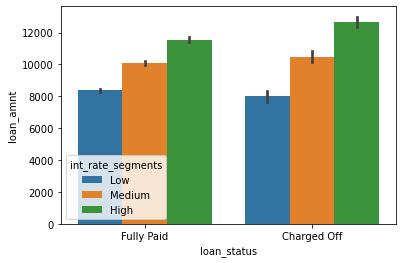

In [68]:
# Plotting the graph between Loan_Status and loan_amnt, int_rate_segments

sns.barplot(data=loan_df_cleansed, x="loan_status", y="loan_amnt", hue='int_rate_segments')
plt.show()

#### Maximum Loan applicants belonging to charged off group have higher loan amounts and have interest rates too.

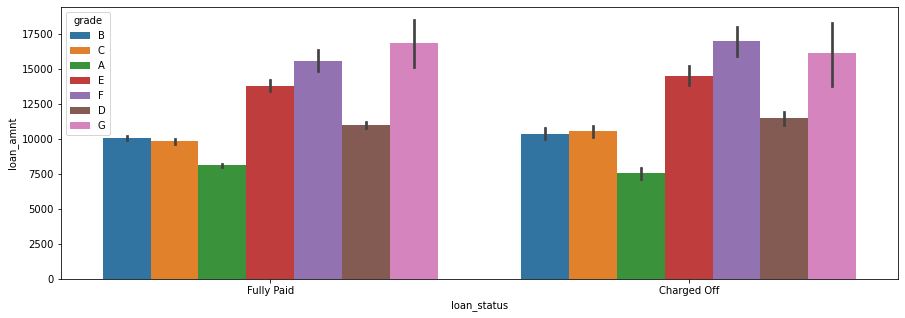

In [71]:
# Plotting the graph between Loan_Status, loan_amnt, grade

plt.figure(figsize=[15,5])
sns.barplot(data=loan_df_cleansed, x="loan_status", y="loan_amnt", hue='grade')
plt.show()

#### Maximum Loan applicant from charged off group belong to grade "F" and their loan amount also high

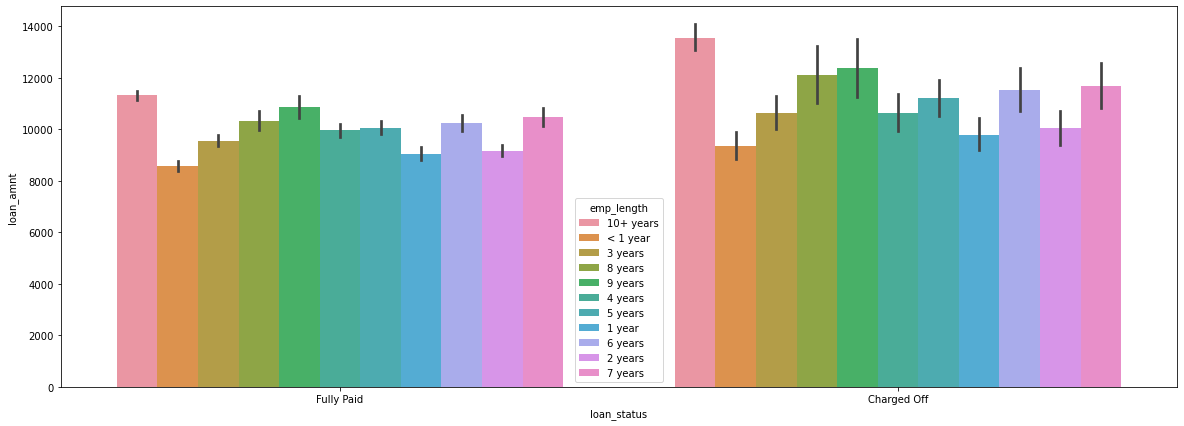

In [78]:
# Plotting the graph between Loan_Status, loan_amnt and employee lenght 

plt.figure(figsize=[20,7])
sns.barplot(data=loan_df_cleansed, x="loan_status", y="loan_amnt", hue='emp_length')
plt.show()

#### Maximum Loan applicants from charged off group have higher loan amount and belong to +10 Years of employment length category

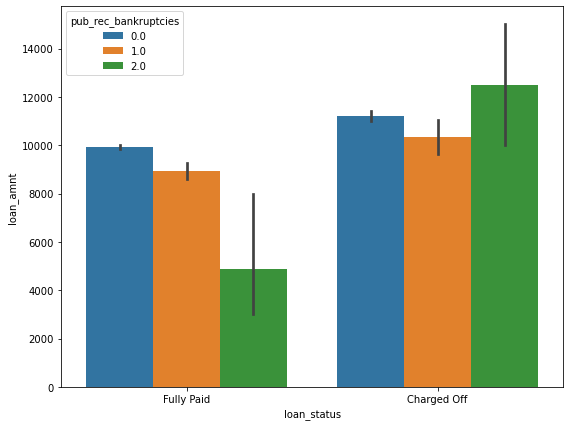

In [79]:
# Plotting the graph between Loan_Status, loan_amnt and public bankruptcies report 
plt.figure(figsize=[9,7])
sns.barplot(data=loan_df_cleansed, x="loan_status", y="loan_amnt", hue='pub_rec_bankruptcies')
plt.show()

#### Maximum applicants from charged off group have high loan and more bankruptcies records on their name

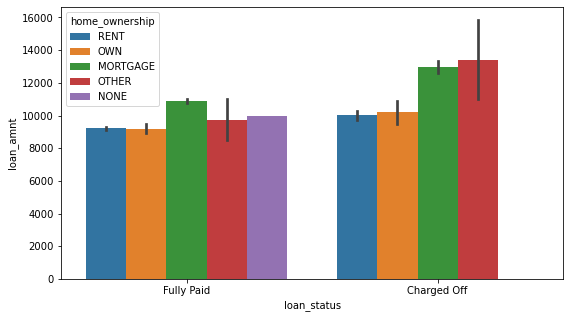

In [80]:
# Plotting the graph between Loan_Status, loan_amnt and home_ownership 
plt.figure(figsize=[9,5])
sns.barplot(data=loan_df_cleansed, x="loan_status", y="loan_amnt", hue='home_ownership')
plt.show()

#### Maximum applicants from charged off group have higher loan amount and their homeownership details are specified as "Other"

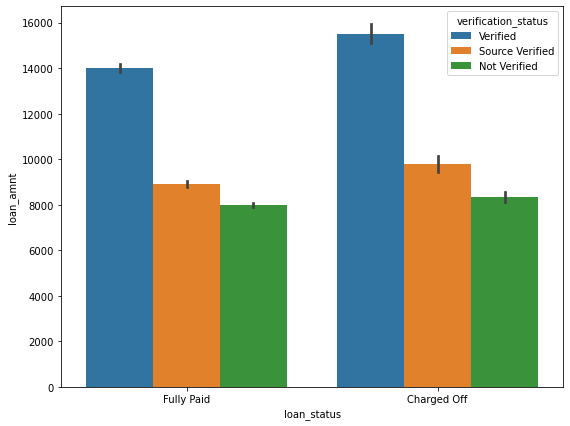

In [81]:
# Plotting the graph between Loan_Status, loan_amnt and loan verification status
plt.figure(figsize=[9,7])
sns.barplot(data=loan_df_cleansed, x="loan_status", y="loan_amnt", hue='verification_status')
plt.show()

#### Maximum applicants from charged off group  have higher loan amount and their verification status seems to "verified"

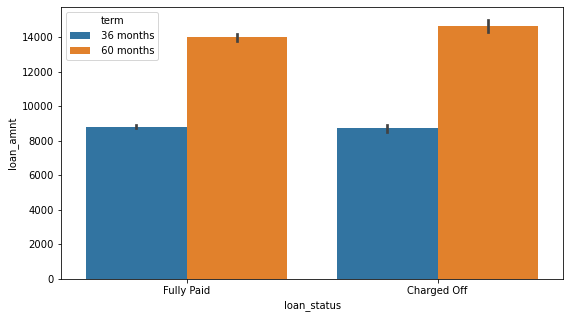

In [82]:
# Plotting the graph between Loan_Status, loan_amnt and Loan Term
plt.figure(figsize=[9,5])
sns.barplot(data=loan_df_cleansed, x="loan_status", y="loan_amnt", hue='term')
plt.show()

#### Maximum applicants from charged off group have higher loan amount and their loan term is high

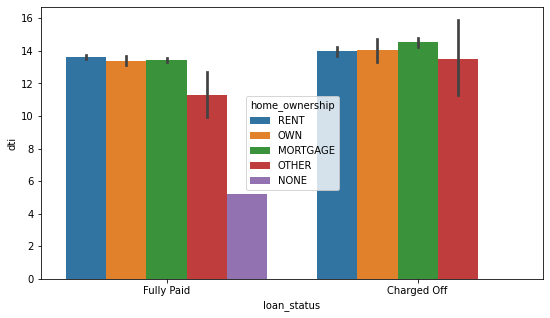

In [87]:
# Plotting the graph between Loan_Status, dti and home_ownership
plt.figure(figsize=[9,5])
sns.barplot(data=loan_df_cleansed, x="loan_status", y="dti", hue='home_ownership')
plt.show()

#### Maximum applicants from charged off group with higher DTI have mortage 

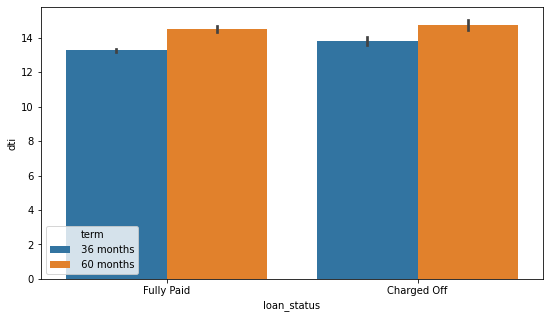

In [88]:
# Plotting the graph between Loan_Status, dti and home_ownership
plt.figure(figsize=[9,5])
sns.barplot(data=loan_df_cleansed, x="loan_status", y="dti", hue='term')
plt.show()

#### Maximum applicants from charged off group have slightly higher DTI for both 36 & 60 months loan term compared to the fully paid loan applications.

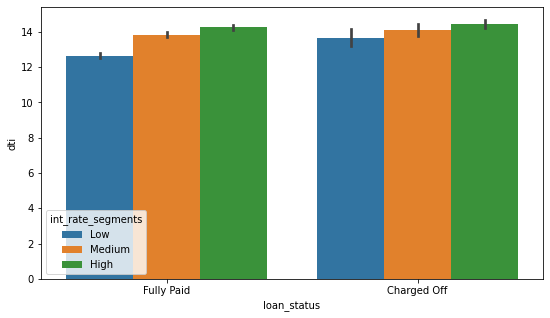

In [89]:
# Plotting the graph between Loan_Status, dti and home_ownership
plt.figure(figsize=[9,5])
sns.barplot(data=loan_df_cleansed, x="loan_status", y="dti", hue='int_rate_segments')
plt.show()

#### Maximum applicants from charged off group with higher DTI seems to belong to higher interest rate segment

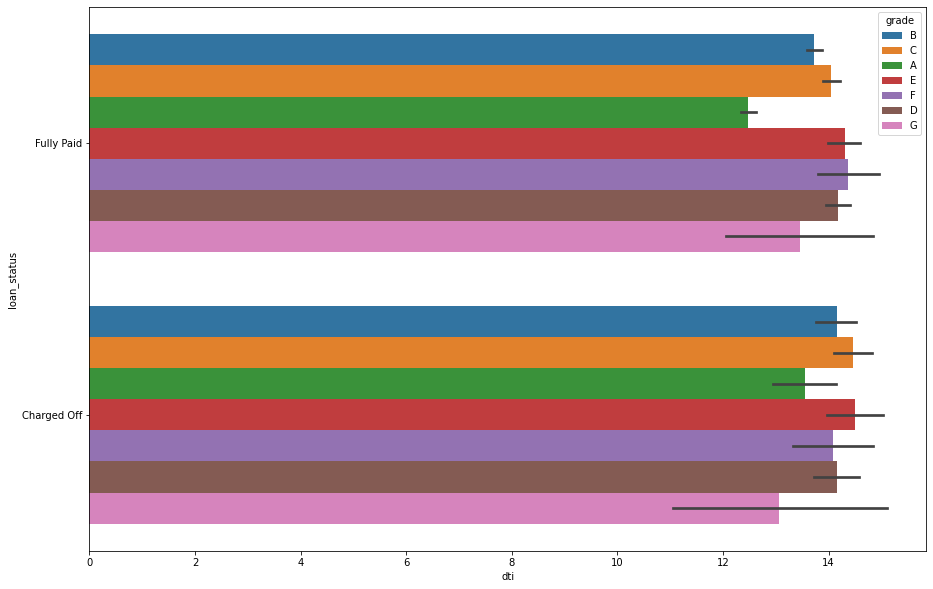

In [108]:
# Plotting the graph between Loan_Status, dti and home_ownership
plt.figure(figsize=[15,10])
sns.barplot(data=loan_df_cleansed, y="loan_status", x="dti", hue='grade', orient="h")
plt.show()

#### Maximum applicants from charged off group with higher DTI belong to either 'C' or 'E' grades

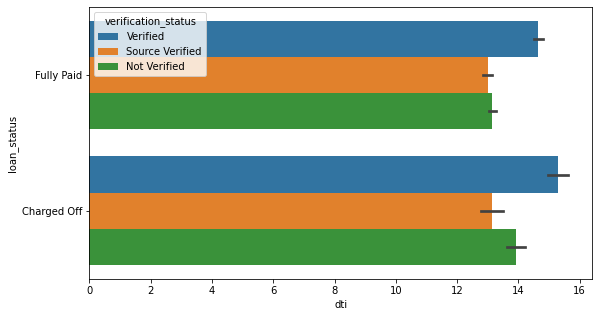

In [109]:
# Plotting the graph between Loan_Status, dti and home_ownership
plt.figure(figsize=[9,5])
sns.barplot(data=loan_df_cleansed, y="loan_status", x="dti", hue='verification_status', orient='h')
plt.show()

#### Maximum applicants from charged off group with higher DTI seems to have verification status as "Verified"

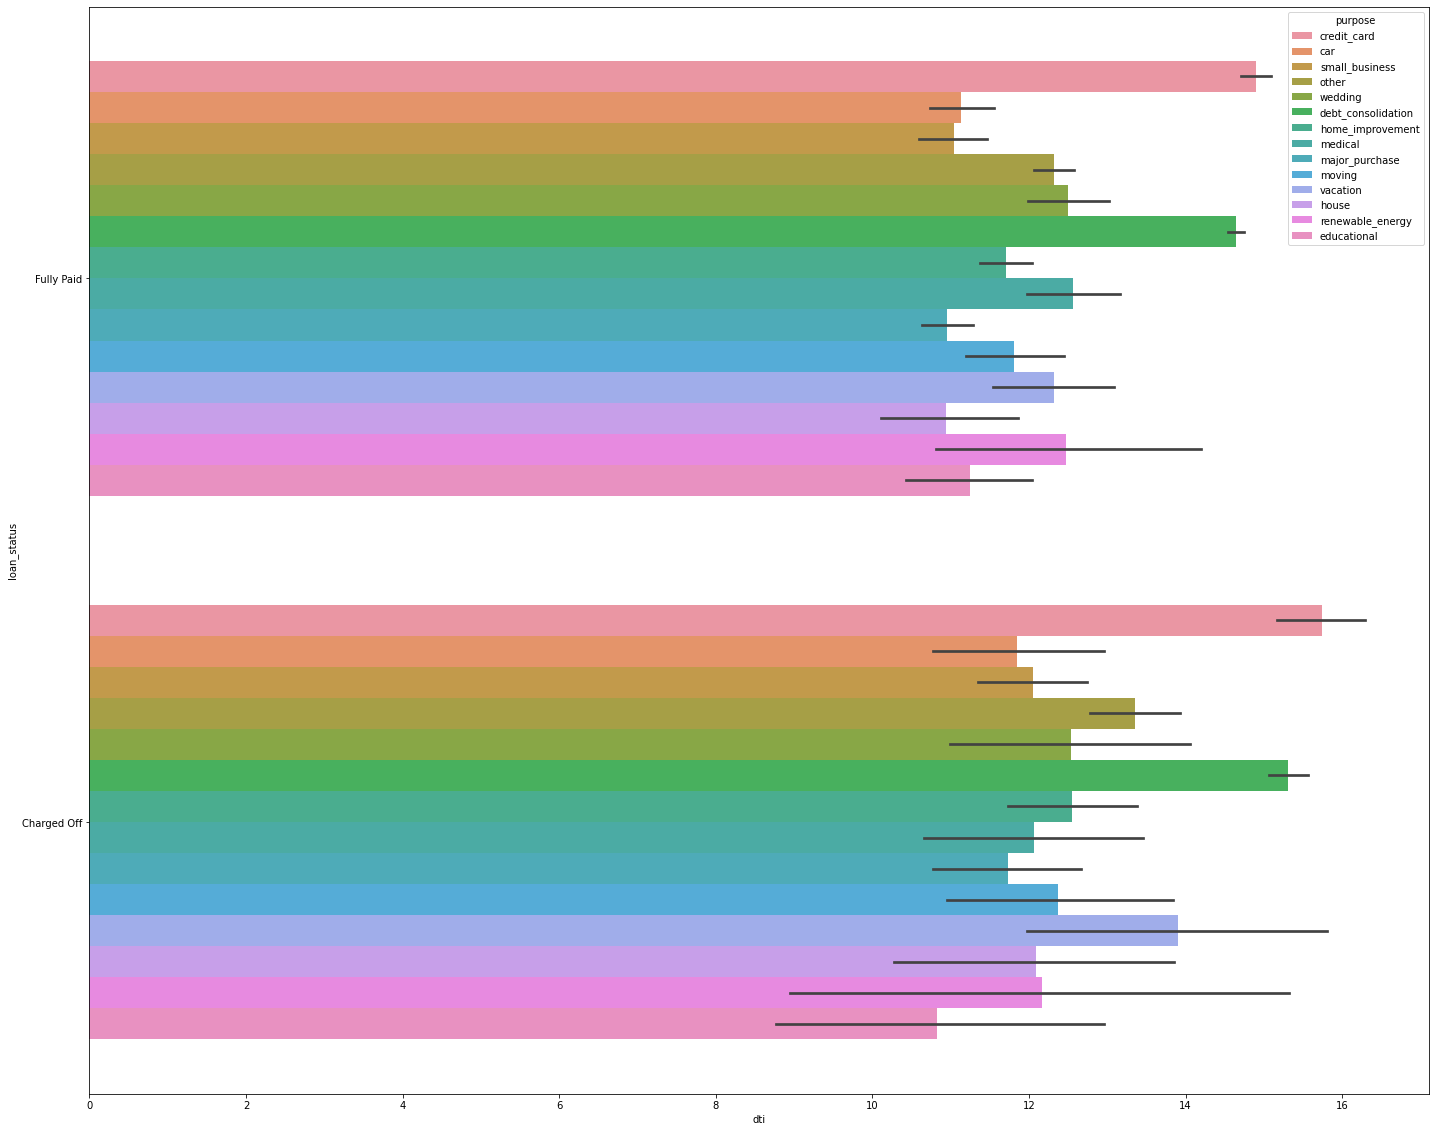

In [112]:
# Plotting the graph between Loan_Status, dti and home_ownership
plt.figure(figsize=[24,20])
sns.barplot(data=loan_df_cleansed, y="loan_status", x="dti", hue='purpose')
plt.show()

#### Maximum applicants from charged off group with higher DTI belong to "credit card" payments

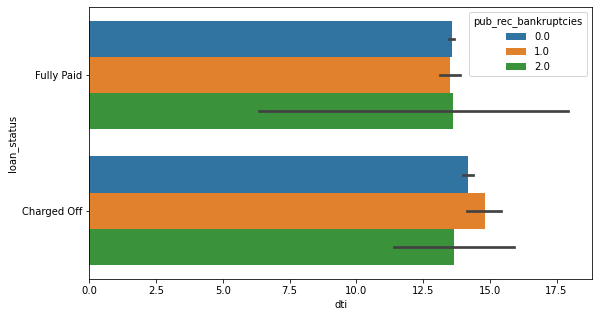

In [114]:
# Plotting the graph between Loan_Status, dti and home_ownership
plt.figure(figsize=[9,5])
sns.barplot(data=loan_df_cleansed, y="loan_status", x="dti", hue='pub_rec_bankruptcies', orient='h')
plt.show()

#### Maximum applicants from charged off group with higher DTI have 1 bankruptcy record

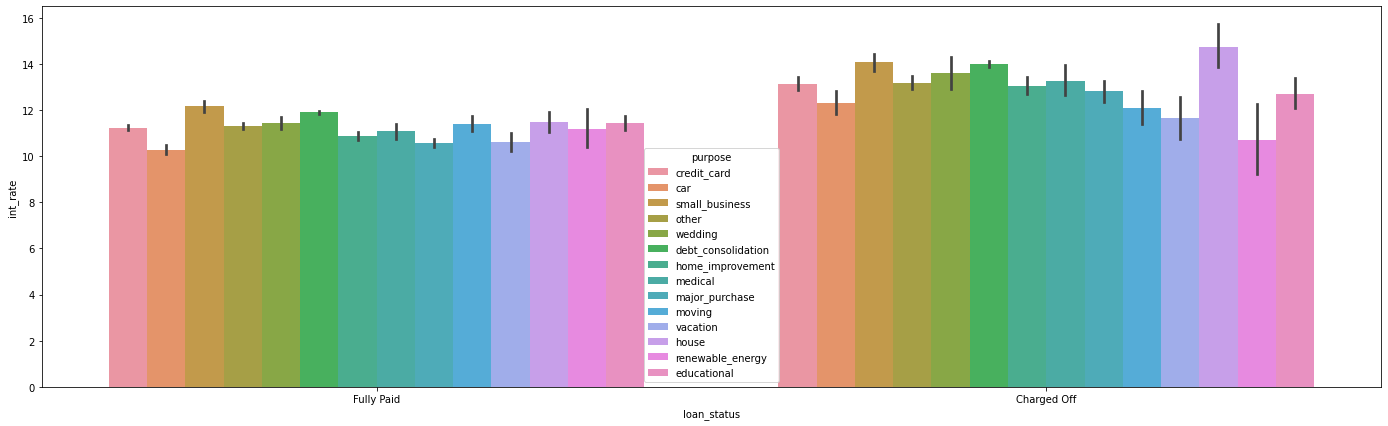

In [116]:
# Plotting the graph between Loan_Status, dti and home_ownership
plt.figure(figsize=[24,7])
sns.barplot(data=loan_df_cleansed, x="loan_status", y="int_rate", hue='purpose')
plt.show()

#### Maximum applicants from charged off group have higher interest rate and purpose seems to be 'house'